In [7]:
import xarray as xr
import matplotlib.pyplot as plt

In [3]:
data_ssp126 = xr.open_dataset("/home/ostronet/kurser/see110/sim_outputs/output_ssp126.nc",engine="netcdf4")
data_ssp370 = xr.open_dataset("/home/ostronet/kurser/see110/sim_outputs/output_ssp370.nc",engine="netcdf4")
data_ssp585 = xr.open_dataset("/home/ostronet/kurser/see110/sim_outputs/output_ssp585.nc",engine="netcdf4")

In [13]:
print(data_ssp126.data_vars)

Data variables:
    volume                        (time, rgi_id) float32 87kB 3.582e+09 ... 0.0
    volume_bsl                    (time, rgi_id) float32 87kB ...
    volume_bwl                    (time, rgi_id) float32 87kB ...
    area                          (time, rgi_id) float32 87kB ...
    length                        (time, rgi_id) float32 87kB ...
    calving                       (time, rgi_id) float32 87kB ...
    calving_rate                  (time, rgi_id) float32 87kB ...
    off_area                      (time, rgi_id) float32 87kB ...
    on_area                       (time, rgi_id) float32 87kB ...
    melt_off_glacier              (time, rgi_id) float32 87kB ...
    melt_on_glacier               (time, rgi_id) float32 87kB ...
    liq_prcp_off_glacier          (time, rgi_id) float32 87kB ...
    liq_prcp_on_glacier           (time, rgi_id) float32 87kB ...
    snowfall_off_glacier          (time, rgi_id) float32 87kB ...
    snowfall_on_glacier           (time, rgi_i

In [21]:
parameter = "volume"  #Variabeln vi vill kolla på 

total_volume_ssp126 = data_ssp126[parameter].sum(dim='rgi_id')
total_volume_ssp370 = data_ssp370[parameter].sum(dim='rgi_id')
total_volume_ssp585 = data_ssp585[parameter].sum(dim='rgi_id')

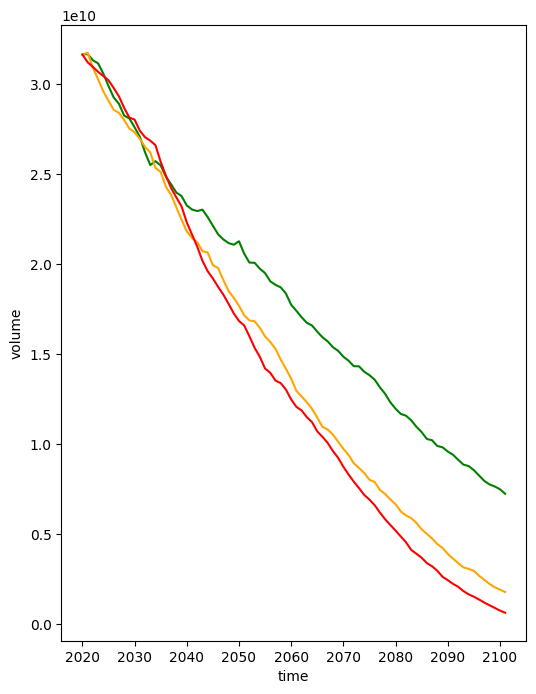

In [22]:
fig, ax = plt.subplots(figsize=(6,8))
total_volume_ssp126.plot(ax=ax, color="g")
total_volume_ssp370.plot(ax=ax, color="orange")
total_volume_ssp585.plot(ax=ax, color="r")

plt.show()